In [ ]:
# 1.

import pandas as pd
import random

data = {
    'Registration Number': [f'R{1000+i}' for i in range(1, 51)],
    'Name': [f'Student {i}' for i in range(1, 51)],
    'TT-1 Marks': [random.randint(0, 20) for _ in range(50)]
}

df = pd.DataFrame(data)
df.to_csv('term-test-1-result.csv', index=False)

print(df.head())


  Registration Number       Name  TT-1 Marks
0               R1001  Student 1          15
1               R1002  Student 2           6
2               R1003  Student 3          17
3               R1004  Student 4          20
4               R1005  Student 5          20


In [ ]:
# 2.

import pandas as pd
import random

data = {
    'Registration Number': [f'R{1000+i}' for i in range(1, 51)],
    'Name': [f'Student {i}' for i in range(1, 51)],
    'TT-2 Marks': [random.randint(0, 20) for _ in range(50)]
}

df = pd.DataFrame(data)
df.to_csv('term-test-2-result.csv', index=False)

print(df.head())


  Registration Number       Name  TT-2 Marks
0               R1001  Student 1          17
1               R1002  Student 2          19
2               R1003  Student 3           7
3               R1004  Student 4           7
4               R1005  Student 5          17


In [ ]:
# 3.

import pandas as pd

df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')
merged_df = pd.merge(df_tt1, df_tt2, on='Registration Number')

print(merged_df.head())


  Registration Number     Name_x  TT-1 Marks     Name_y  TT-2 Marks
0               R1001  Student 1          15  Student 1          17
1               R1002  Student 2           6  Student 2          19
2               R1003  Student 3          17  Student 3           7
3               R1004  Student 4          20  Student 4           7
4               R1005  Student 5          20  Student 5          17


In [ ]:
# 4.

merged_df['Best Term Test Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Term Test Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

print(merged_df.head())


  Registration Number     Name_x  TT-1 Marks     Name_y  TT-2 Marks  \
0               R1001  Student 1          15  Student 1          17   
1               R1002  Student 2           6  Student 2          19   
2               R1003  Student 3          17  Student 3           7   
3               R1004  Student 4          20  Student 4           7   
4               R1005  Student 5          20  Student 5          17   

   Best Term Test Marks  Average Term Test Marks  
0                    17                     16.0  
1                    19                     12.5  
2                    17                     12.0  
3                    20                     13.5  
4                    20                     18.5  


In [ ]:
# 5.


merged_df = merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

print(merged_df.head())


  Registration Number     Name_x     Name_y  Best Term Test Marks  \
0               R1001  Student 1  Student 1                    17   
1               R1002  Student 2  Student 2                    19   
2               R1003  Student 3  Student 3                    17   
3               R1004  Student 4  Student 4                    20   
4               R1005  Student 5  Student 5                    20   

   Average Term Test Marks  
0                     16.0  
1                     12.5  
2                     12.0  
3                     13.5  
4                     18.5  


In [ ]:
# 6.

import pandas as pd
import random

attendance_data = {
    'Registration Number': [f'R{1000+i}' for i in range(1, 51)],
    'Attendance Marks': [random.randint(8, 10) for _ in range(50)],
    'Term Final Marks': [random.randint(70, 100) for _ in range(50)]
}

attendance_df = pd.DataFrame(attendance_data)
attendance_df.to_csv('attendance_term_final_marks.csv', index=False)
attendance_df = pd.read_csv('attendance_term_final_marks.csv')

final_df = pd.merge(merged_df, attendance_df, on='Registration Number')
final_df['Final Marks'] = (final_df['Term Final Marks'] * 0.7) + final_df['Average Term Test Marks'] + final_df['Attendance Marks']

print(final_df.head())


  Registration Number     Name_x     Name_y  Best Term Test Marks  \
0               R1001  Student 1  Student 1                     9   
1               R1002  Student 2  Student 2                    20   
2               R1003  Student 3  Student 3                    13   
3               R1004  Student 4  Student 4                    10   
4               R1005  Student 5  Student 5                    19   

   Average Term Test Marks  Attendance Marks  Term Final Marks  Final Marks  
0                      7.5                10                72         67.9  
1                     15.5                 8                89         85.8  
2                      8.5                 8                79         71.8  
3                      8.5                10               100         88.5  
4                      9.5                 9                89         80.8  


In [ ]:
# 7.
final_df.to_csv('final result.csv', index=False)

print("The 'final result.csv' file has been saved successfully!")


The 'final result.csv' file has been saved successfully!


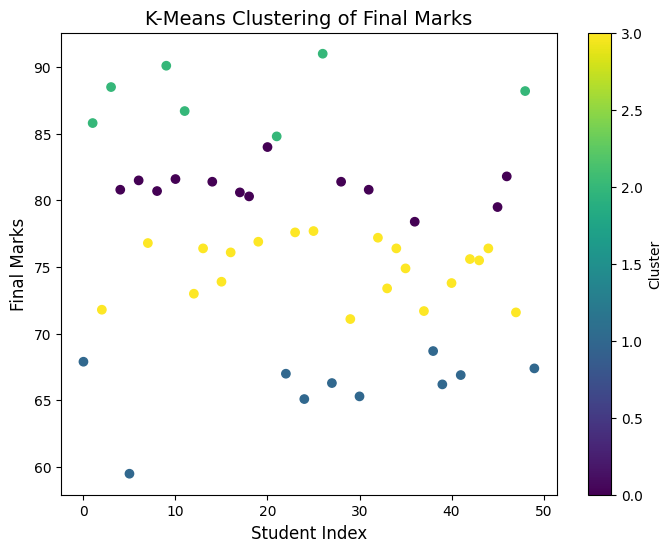

In [ ]:
# 8.

import pandas as pd
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

final_marks = final_df[['Final Marks']]
kmeans = KMeans(n_clusters=4, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_marks)

plt.figure(figsize=(8, 6))
plt.scatter(final_df.index, final_df['Final Marks'], c=final_df['Cluster'], cmap='viridis', marker='o')

plt.title('K-Means Clustering of Final Marks', fontsize=14)
plt.xlabel('Student Index', fontsize=12)
plt.ylabel('Final Marks', fontsize=12)
plt.colorbar(label='Cluster')

plt.show()
